# kc_housing_analysis

Import libraries that will be used later

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
# Set plot space as inline for inline plots display
%matplotlib inline

## Load data and check data format

In [2]:
housing_df = pd.read_csv('kc_house_data.csv', na_values = '?')

In [3]:
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
housing_df.shape

(21597, 21)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [6]:
column_list = list(housing_df.columns)
unique_value_of_each_column = list(map(lambda x:housing_df[x].unique(), column_list))
unique_value_of_each_column

[array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
        1523300157]),
 array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
        '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
        '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
        '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
        '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
        '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
        '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
        '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
        '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
        '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
        '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
        '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
        '8/25/2014', '6/12/201

## Data cleaning

### checking missing values

In [7]:
housing_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Replace missing values with median

In [9]:
list_missing_value_columns = ['waterfront', 'view', 'yr_renovated','sqft_basement']
list_missing_value_columns

for value in list_missing_value_columns:
    median_value = housing_df[value].median()
    housing_df[value].fillna(median_value, inplace=True)
# housing_df['waterfront'].fillna(housing_df['waterfront'].median(), inplace=True)
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# double check if anything is missing
housing_df.isna().any().any()

False

### Drop useless column

There seems quite a few duplicated id number with different information so for better understanding we will drop them

In [11]:
housing_df.drop(columns='id', inplace=True)

In [12]:
housing_df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


520

For now data cleaning is being done, for categorical variables we will create dummy variables in later.

### Question 1: As a property adviser, how does internal property factors affect housing price? What are the factors that can mostly predict the housing price and how can you use it to improve your investigation?

## Data visualization

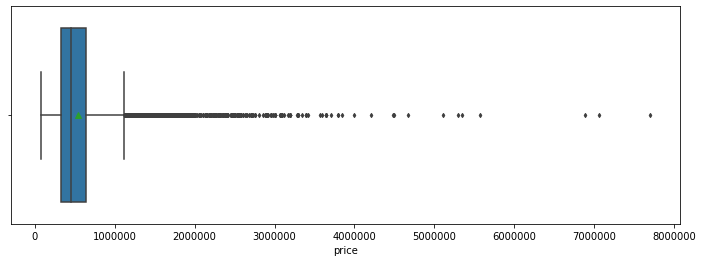

In [13]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

From the figure below we can see most of the housing price ranges in the number between 0-1 millions but there're few outliers above 6 millions but in this case we will keep it.

### Continuous Variables for internal factors

In this report, we will considersqft_living, sqft_lot, sqft_above, sqft_basement as continuous variables, bathrooms, bedrooms, floors, grade as categorical variables.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


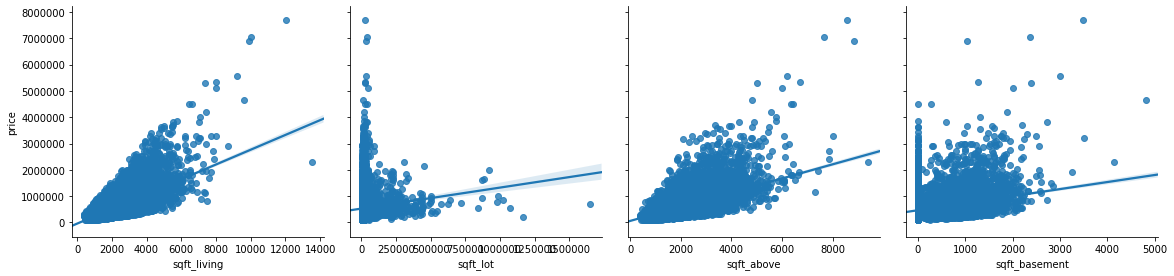

In [14]:
internal_factors = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement']
sns.pairplot(data=housing_df,
                  y_vars=['price'],
                  x_vars=internal_factors,
                  kind = 'reg',
                  size=4)

### Check if it's normally distributed

In [17]:
x_cols = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement','price']

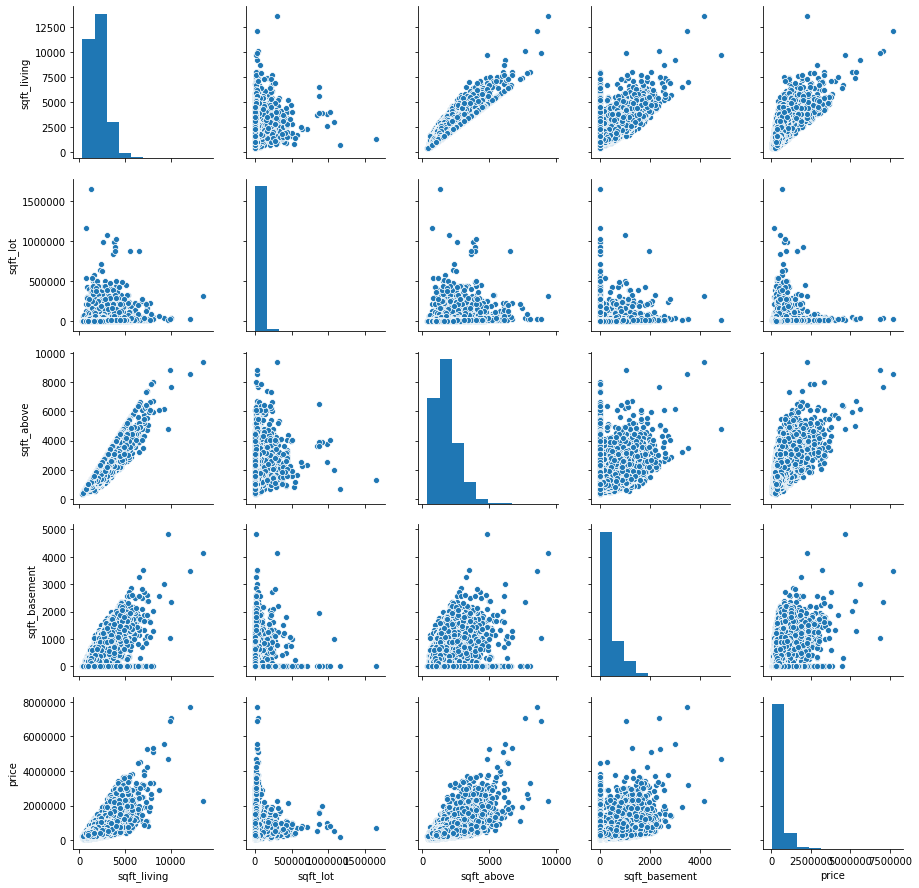

In [16]:
sns.pairplot(housing_df[x_cols])

### Log transformation

In [15]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'price']
for variable in non_normal:
    housing_df[variable] = housing_df[variable].map(lambda x: np.log(x))


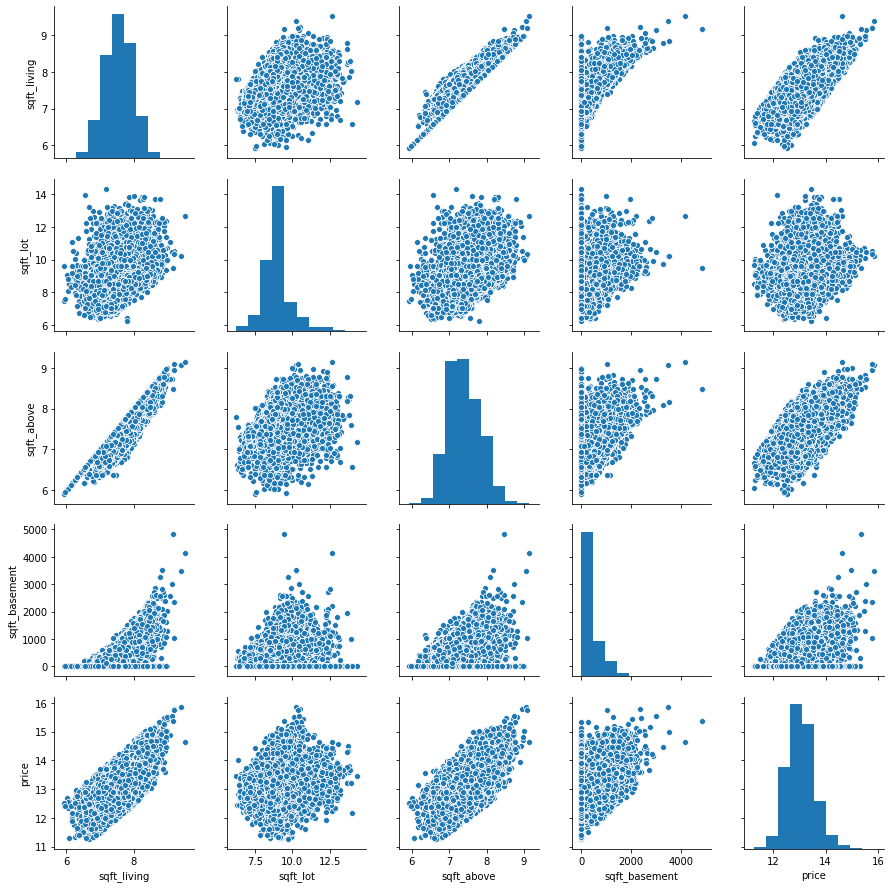

In [18]:
sns.pairplot(housing_df[x_cols])

from the the figures showing above, we can see the sqft_living and sqft_above look like having a stronger impact on the housing price, and we will analyse this when we test for the linear regression model.

### Categorical Variables for internal factors

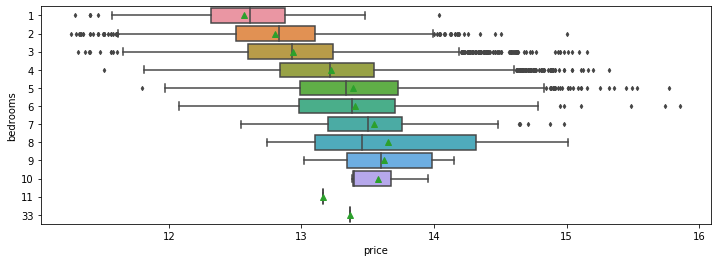

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bedrooms', 
            x = 'price', 
            data = housing_df,width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

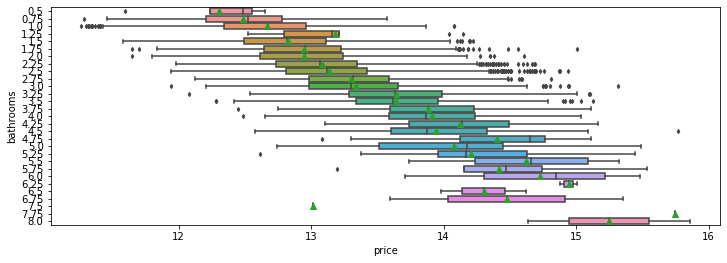

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bathrooms', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

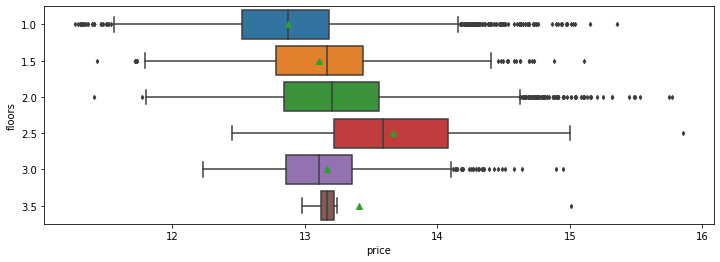

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

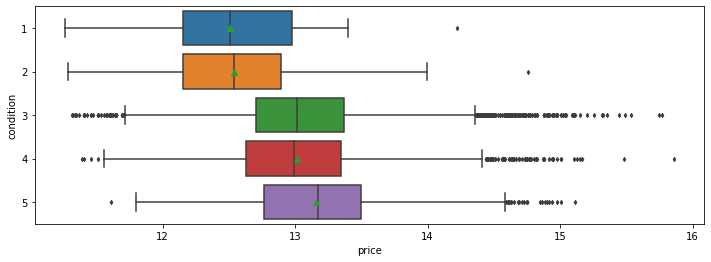

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

From the figures above, it shows condition has a strong impact with housing price and we will create dummy variables for condition factor to test how much it actually affects with the housing price.

## Creat dummy variables for internal categorical variables

In [23]:
floor_dummies = pd.get_dummies(housing_df['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(housing_df['bathrooms'], prefix='bath', drop_first=True)
condition_dummies = pd.get_dummies(housing_df['condition'], prefix='con', drop_first=True)
bedrooms_dummies = pd.get_dummies(housing_df['bedrooms'], prefix='bed', drop_first=True)

housing_df = housing_df.drop(['floors','bathrooms','condition','bedrooms'], axis=1)

housing_df = pd.concat([housing_df, 
                        floor_dummies, 
                        bathrooms_dummies, 
                        condition_dummies, 
                        bedrooms_dummies,
                        ], axis=1)
housing_df.head()

,date,price,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,...,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,10/13/2014,12.309982,7.073270,8.639411,0.0,0.0,7,7.073270,0.0,1955,...,1,0,0,0,0,0,0,0,0,0
1,12/9/2014,13.195614,7.851661,8.887653,0.0,0.0,7,7.682482,400.0,1951,...,1,0,0,0,0,0,0,0,0,0
2,2/25/2015,12.100712,6.646391,9.210340,0.0,0.0,6,6.646391,0.0,1933,...,0,0,0,0,0,0,0,0,0,0
3,12/9/2014,13.311329,7.580700,8.517193,0.0,0.0,7,6.956545,910.0,1965,...,0,1,0,0,0,0,0,0,0,0
4,2/18/2015,13.142166,7.426549,8.997147,0.0,0.0,8,7.426549,0.0,1987,...,1,0,0,0,0,0,0,0,0,0


In [24]:
housing_df.dtypes

date            object
price          float64
sqft_living    float64
sqft_lot       float64
waterfront     float64
                ...   
bed_8            uint8
bed_9            uint8
bed_10           uint8
bed_11           uint8
bed_33           uint8
Length: 64, dtype: object

In [25]:
housing_df.dtypes[:50]

date              object
price            float64
sqft_living      float64
sqft_lot         float64
waterfront       float64
view             float64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
floors_1.5         uint8
floors_2.0         uint8
floors_2.5         uint8
floors_3.0         uint8
floors_3.5         uint8
bath_0.75          uint8
bath_1.0           uint8
bath_1.25          uint8
bath_1.5           uint8
bath_1.75          uint8
bath_2.0           uint8
bath_2.25          uint8
bath_2.5           uint8
bath_2.75          uint8
bath_3.0           uint8
bath_3.25          uint8
bath_3.5           uint8
bath_3.75          uint8
bath_4.0           uint8
bath_4.25          uint8
bath_4.5           uint8
bath_4.75          uint8
bath_5.0           uint8
bath_5.25          uint8


In [26]:
housing_df.keys()

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
       'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
       'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
       'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
       'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
       'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
       'bath_7.75', 'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
       'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
       'bed_11', 'bed_33'],
      dtype='object')

## Single Linear Regression

R-Squared: 0.45535727584899854
Intercept      6.723413
sqft_living    0.837642
dtype: float64


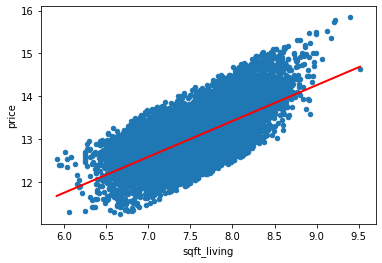

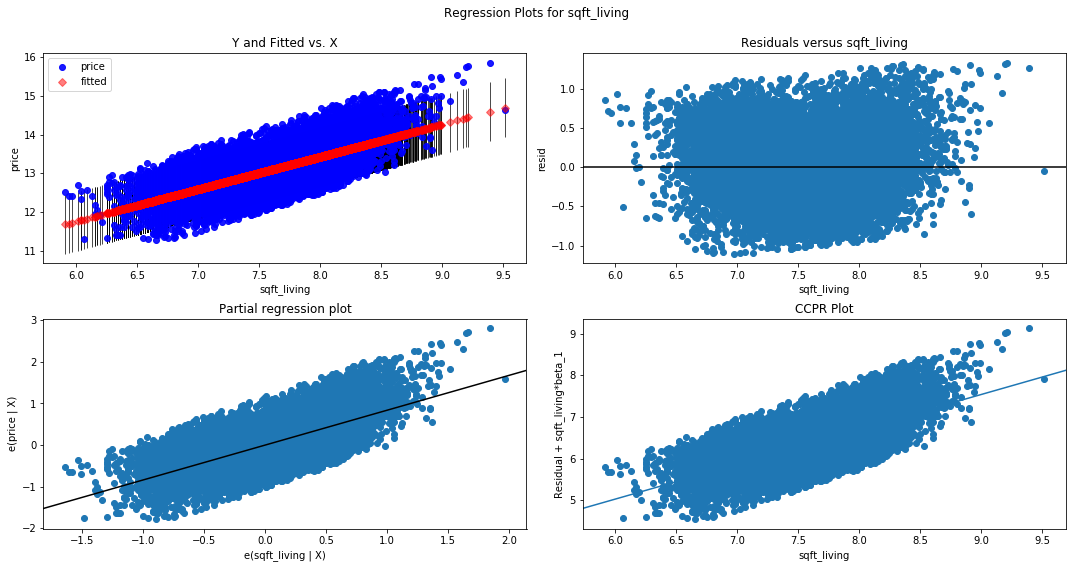

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


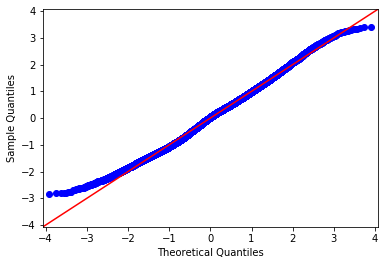

In [31]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living': [housing_df.sqft_living.min(), housing_df.sqft_living.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:09:23   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.3434109763900405
Intercept     7.705927
sqft_above    0.722404
dtype: float64


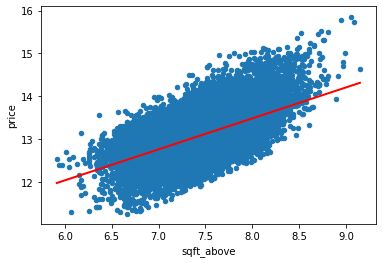

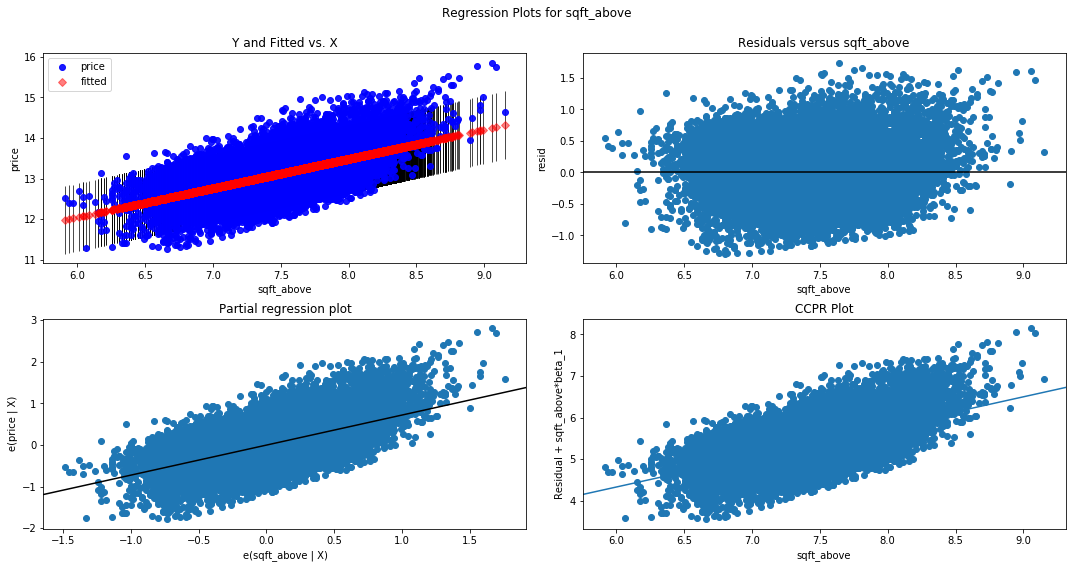

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


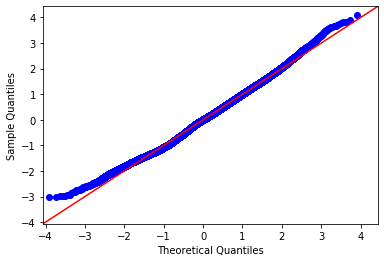

In [33]:
f = 'price~sqft_above'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [housing_df.sqft_above.min(), housing_df.sqft_above.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:09:42   Log-Likelihood:                -12249.
No. Observations:               21597   AIC:                         2.450e+04
Df Residuals:                   21595   BIC:                         2.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7059      0.050    153.042      0.000       7.607       7.805
sqft_above     0.7224      0.007    106.276      0.000       0.709       0.736
==============================================================================
Omnibus:                      138.764   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.438
Skew:                           0.188   Prob(JB):                     5.27e-31
Kurtosis:                       2.883   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi Linear Regression

It seems like sqft_living factor has the strongest impact over housing price, so we will try some different conbinations with sqft_living and other factors

In [49]:
X = housing_df[['sqft_living', 'sqft_lot',
   'sqft_basement', 'floors_1.5', 'sqft_above',
   'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
   'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
   'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
   'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
   'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
   'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
    'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
   'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
   'bed_11', 'bed_33']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     464.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:15:50   Log-Likelihood:                -8786.7
No. Observations:               21597   AIC:                         1.768e+04
Df Residuals:                   21545   BIC:                         1.809e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.5436      0.195     33.628      0.000       6.162       6.925
sqft_living       0.6820      0.033     20.570      0.000       0.617       0.747
sqft_lot         -0.0457      0.003    -13.254      0.000      -0.052      -0.039
sqft_basement     0.0001   1.57e-05      8.365      0.000       0.000       0.000
floors_1.5        0.1310      0.010     13.741      0.000       0.112       0.150
sqft_above        0.2516      0.030      8.457      0.000       0.193       0.310
floors_2.0        0.0183      0.009      2.111      0.035       0.001       0.035
floors_2.5        0.2121      0.030      7.050      0.000       0.153       0.271
floors_3.0        0.1880      0.018     10.649      0.000       0.153       0.223
floors_3.5        0.2260      0.139      1.628      0.104      -0.046       0.498
bath_0.75         0.0425      0.169      0.252      0.801      -0.288       0.373
bath_1.0          0.0033      0.163      0.020      0.984      -0.316       0.323
bath_1.25         0.1645      0.203      0.810      0.418      -0.234       0.563
bath_1.5         -0.0443      0.163     -0.272      0.786      -0.364       0.276
bath_1.75        -0.0161      0.163     -0.099      0.921      -0.336       0.304
bath_2.0         -0.0358      0.163     -0.219      0.826      -0.356       0.284
bath_2.25        -0.0209      0.163     -0.128      0.898      -0.341       0.299
bath_2.5         -0.0685      0.163     -0.420      0.675      -0.388       0.251
bath_2.75         0.0057      0.163      0.035      0.972      -0.314       0.326
bath_3.0          0.0179      0.164      0.110      0.913      -0.303       0.338
bath_3.25         0.1755      0.164      1.072      0.284      -0.145       0.496
bath_3.5          0.1286      0.164      0.786      0.432      -0.192       0.449
bath_3.75         0.2827      0.166      1.707      0.088      -0.042       0.607
bath_4.0          0.2611      0.166      1.572      0.116      -0.064       0.587
bath_4.25         0.3167      0.168      1.881      0.060      -0.013       0.647
bath_4.5          0.2226      0.167      1.331      0.183      -0.105       0.550
bath_4.75         0.4579      0.180      2.540      0.011       0.105       0.811
bath_5.0          0.3106      0.182      1.710      0.087      -0.045       0.667
bath_5.25         0.4073      0.193      2.114      0.034       0.030       0.785
bath_5.5          0.5613      0.200      2.806      0.005       0.169       0.953
bath_5.75         0.3558      0.245      1.450      0.147      -0.125       0.837
bath_6.0          0.6536      0.222      2.946      0.003       0.219       1.089
bath_6.25         0.6005      0.305      1.967      0.049       0.002       1.199
bath_6.5          0.2293      0.305      0.752      0.452      -0.369       0.827
bath_6.75        -0.0061      0.309     -0.020   

In [40]:
X = housing_df[['sqft_living', 'sqft_lot',
   'sqft_basement', 'floors_1.5',
   'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
   'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
   'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
   'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
   'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
   'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
    'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
   'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
   'bed_11', 'bed_33']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     470.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:11:45   Log-Likelihood:                -8822.5
No. Observations:               21597   AIC:                         1.775e+04
Df Residuals:                   21546   BIC:                         1.815e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4232      0.194     33.044      0.000       6.042       6.804
sqft_living       0.9413      0.013     74.479      0.000       0.917       0.966
sqft_lot         -0.0410      0.003    -12.019      0.000      -0.048      -0.034
sqft_basement  1.637e-05   7.87e-06      2.080      0.038    9.46e-07    3.18e-05
floors_1.5        0.1399      0.009     14.745      0.000       0.121       0.158
floors_2.0        0.0317      0.009      3.701      0.000       0.015       0.048
floors_2.5        0.2315      0.030      7.703      0.000       0.173       0.290
floors_3.0        0.2097      0.018     11.982      0.000       0.175       0.244
floors_3.5        0.2599      0.139      1.870      0.062      -0.013       0.532
bath_0.75         0.0628      0.169      0.372      0.710      -0.268       0.394
bath_1.0          0.0266      0.163      0.163      0.871      -0.294       0.347
bath_1.25         0.1696      0.203      0.834      0.404      -0.229       0.568
bath_1.5         -0.0283      0.163     -0.173      0.862      -0.349       0.292
bath_1.75        -0.0076      0.163     -0.047      0.963      -0.328       0.313
bath_2.0         -0.0251      0.163     -0.154      0.878      -0.345       0.295
bath_2.25        -0.0090      0.163     -0.055      0.956      -0.329       0.311
bath_2.5         -0.0545      0.163     -0.334      0.739      -0.375       0.266
bath_2.75         0.0200      0.164      0.122      0.903      -0.301       0.341
bath_3.0          0.0350      0.164      0.214      0.831      -0.286       0.356
bath_3.25         0.1996      0.164      1.217      0.223      -0.122       0.521
bath_3.5          0.1549      0.164      0.945      0.344      -0.166       0.476
bath_3.75         0.3105      0.166      1.871      0.061      -0.015       0.636
bath_4.0          0.2958      0.166      1.778      0.075      -0.030       0.622
bath_4.25         0.3667      0.168      2.176      0.030       0.036       0.697
bath_4.5          0.2586      0.167      1.544      0.123      -0.070       0.587
bath_4.75         0.5203      0.180      2.884      0.004       0.167       0.874
bath_5.0          0.3647      0.182      2.006      0.045       0.008       0.721
bath_5.25         0.4533      0.193      2.351      0.019       0.075       0.831
bath_5.5          0.6131      0.200      3.062      0.002       0.221       1.006
bath_5.75         0.4552      0.246      1.854      0.064      -0.026       0.936
bath_6.0          0.7553      0.222      3.404      0.001       0.320       1.190
bath_6.25         0.6993      0.306      2.289      0.022       0.100       1.298
bath_6.5          0.3076      0.305      1.007      0.314      -0.291       0.906
bath_6.75         0.2799      0.307      0.910      0.363      -0.323       0.883
bath_7.5         -0.5373      0.432     -1.244   

In [36]:
X = housing_df[['sqft_living', 'sqft_lot',
   'floors_1.5',
   'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
   'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
   'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
   'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
   'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
   'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
    'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
   'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
   'bed_11', 'bed_33']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     559.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:26:16   Log-Likelihood:            -2.9853e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21547   BIC:                         5.976e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.674e+05   1.19e+05      6.437      0.000    5.34e+05       1e+06
sqft_living   300.5836      3.155     95.262      0.000     294.399     306.768
sqft_lot       -0.4181      0.041    -10.160      0.000      -0.499      -0.337
floors_1.5   7.601e+04   6164.381     12.330      0.000    6.39e+04    8.81e+04
floors_2.0   6516.3519   4782.740      1.362      0.173   -2858.172    1.59e+04
floors_2.5   2.031e+05   1.98e+04     10.275      0.000    1.64e+05    2.42e+05
floors_3.0    1.28e+05   1.08e+04     11.877      0.000    1.07e+05    1.49e+05
floors_3.5   2.521e+05   9.29e+04      2.713      0.007       7e+04    4.34e+05
bath_0.75   -7.318e+05   1.13e+05     -6.466      0.000   -9.54e+05    -5.1e+05
bath_1.0    -7.322e+05   1.09e+05     -6.691      0.000   -9.47e+05   -5.18e+05
bath_1.25   -6.141e+05   1.36e+05     -4.508      0.000   -8.81e+05   -3.47e+05
bath_1.5     -7.56e+05    1.1e+05     -6.902      0.000   -9.71e+05   -5.41e+05
bath_1.75    -7.64e+05   1.09e+05     -6.982      0.000   -9.78e+05    -5.5e+05
bath_2.0    -7.684e+05   1.09e+05     -7.020      0.000   -9.83e+05   -5.54e+05
bath_2.25    -7.65e+05   1.09e+05     -6.991      0.000    -9.8e+05   -5.51e+05
bath_2.5    -8.103e+05   1.09e+05     -7.410      0.000   -1.02e+06   -5.96e+05
bath_2.75   -7.808e+05    1.1e+05     -7.130      0.000   -9.95e+05   -5.66e+05
bath_3.0    -7.495e+05    1.1e+05     -6.836      0.000   -9.64e+05   -5.35e+05
bath_3.25   -6.359e+05    1.1e+05     -5.794      0.000   -8.51e+05   -4.21e+05
bath_3.5     -7.08e+05    1.1e+05     -6.456      0.000   -9.23e+05   -4.93e+05
bath_3.75   -5.465e+05   1.11e+05     -4.922      0.000   -7.64e+05   -3.29e+05
bath_4.0    -5.502e+05   1.11e+05     -4.942      0.000   -7.68e+05   -3.32e+05
bath_4.25   -4.574e+05   1.13e+05     -4.057      0.000   -6.78e+05   -2.36e+05
bath_4.5    -5.636e+05   1.12e+05     -5.030      0.000   -7.83e+05   -3.44e+05
bath_4.75   -1.559e+05   1.21e+05     -1.291      0.197   -3.93e+05    8.08e+04
bath_5.0    -3.388e+05   1.22e+05     -2.785      0.005   -5.77e+05      -1e+05
bath_5.25   -2.225e+05   1.29e+05     -1.724      0.085   -4.76e+05    3.05e+04
bath_5.5     5.365e+04   1.34e+05      0.400      0.689   -2.09e+05    3.17e+05
bath_5.75   -5.527e+04   1.65e+05     -0.336      0.737   -3.78e+05    2.67e+05
bath_6.0     4.902e+05   1.49e+05      3.298      0.001    1.99e+05    7.82e+05
bath_6.25    3.674e+04   2.05e+05      0.179      0.858   -3.65e+05    4.38e+05
bath_6.5    -8.212e+05   2.05e+05     -4.015      0.000   -1.22e+06    -4.2e+05
bath_6.75   -2.473e+05   2.06e+05     -1.201      0.230   -6.51e+05    1.56e+05
bath_7.5    -1.188e+06   2.89e+05     -4.110      0.000   -1.75e+06   -6.21e+05
bath_8.0     6.515e+05   2.08e+05      3.137      0.002    2.44e+05    1.06e+06
con_2         -2.5e+04   4.91e+04     -0.51

In [34]:
X = housing_df[['sqft_living', 'sqft_lot',
   'floors_1.5',
   'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
   'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
   'bed_11', 'bed_33']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:25:56   Log-Likelihood:            -2.9916e+05
No. Observations:               21597   AIC:                         5.984e+05
Df Residuals:                   21574   BIC:                         5.986e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.249e+04   4.92e+04      0.457      0.648    -7.4e+04    1.19e+05
sqft_living   332.8850      2.574    129.339      0.000     327.840     337.930
sqft_lot       -0.4011      0.042     -9.488      0.000      -0.484      -0.318
floors_1.5   7.908e+04   6299.500     12.553      0.000    6.67e+04    9.14e+04
floors_2.0  -1.696e+04   4304.248     -3.939      0.000   -2.54e+04   -8518.551
floors_2.5   2.074e+05   2.02e+04     10.253      0.000    1.68e+05    2.47e+05
floors_3.0   1.284e+05   1.06e+04     12.088      0.000    1.08e+05    1.49e+05
floors_3.5   2.102e+05   9.55e+04      2.201      0.028     2.3e+04    3.97e+05
con_2       -2.929e+04   5.05e+04     -0.580      0.562   -1.28e+05    6.97e+04
con_3       -1.968e+04   4.68e+04     -0.421      0.674   -1.11e+05     7.2e+04
con_4        1.993e+04   4.68e+04      0.425      0.671   -7.19e+04    1.12e+05
con_5        8.412e+04   4.71e+04      1.785      0.074   -8247.240    1.76e+05
bed_2       -3.541e+04   1.86e+04     -1.903      0.057   -7.19e+04    1069.411
bed_3        -1.58e+05   1.83e+04     -8.636      0.000   -1.94e+05   -1.22e+05
bed_4       -2.312e+05   1.87e+04    -12.384      0.000   -2.68e+05   -1.95e+05
bed_5       -2.488e+05   1.97e+04    -12.604      0.000   -2.87e+05    -2.1e+05
bed_6       -2.986e+05   2.42e+04    -12.313      0.000   -3.46e+05   -2.51e+05
bed_7       -4.066e+05   4.51e+04     -9.007      0.000   -4.95e+05   -3.18e+05
bed_8       -1.986e+05   7.26e+04     -2.734      0.006   -3.41e+05   -5.62e+04
bed_9       -4.211e+05   1.04e+05     -4.030      0.000   -6.26e+05   -2.16e+05
bed_10      -4.283e+05   1.46e+05     -2.928      0.003   -7.15e+05   -1.42e+05
bed_11      -4.625e+05   2.52e+05     -1.837      0.066   -9.56e+05     3.1e+04
bed_33      -3478.2773   2.52e+05     -0.014      0.989   -4.97e+05     4.9e+05
==============================================================================
Omnibus:                    13920.028   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           455260.712
Skew:                           2.607   Prob(JB):                         0.00
Kurtosis:                      24.880   Cond. No.                     6.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## All features to fit with model

In [41]:
X = housing_df[['sqft_living', 'sqft_lot', 'waterfront', 'view',
   'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.5',
   'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
   'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
   'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
   'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
   'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
   'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
    'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'bed_2',
   'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
   'bed_11', 'bed_33']]
y = housing_df['price']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1219.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:12:03   Log-Likelihood:                -660.48
No. Observations:               21597   AIC:                             1445.
Df Residuals:                   21535   BIC:                             1940.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1576      3.765      0.839